In [6]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.interpolate import make_interp_spline
from highlight_text import ax_text
import pandas as pd


plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

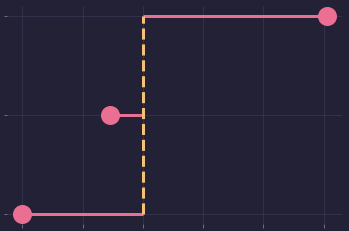

In [7]:

# plt.style.use("seaborn-dark")  # set style because it looks nice
plt.style.use("rose-pine-dawn.mplstyle")

x=['Nuts & Seeds','Grains','Meat']
#LFV means legumes fruits and vegetables

y=[0.60,0.89,1.61]
y.sort()

fig, ax = plt.subplots()

# plt.stem(x, y, markerfmt = 'o', linefmt='-', basefmt = '-', orientation="horizontal", bottom=1)

(markers, stemlines, baseline) = plt.stem(x, y, markerfmt = 'o', linefmt='-', basefmt = '--', orientation="horizontal", bottom=1)
plt.setp(markers, marker='o', markersize=15, markeredgewidth=4)
plt.setp(stemlines, linestyle="-", linewidth=3)
plt.setp(baseline, linestyle="--", linewidth=3)

# plt.show()

# ax.set_title("Coronary Heart Disease Risk in Women by Protein Consumed")
ax.minorticks_off()

ax.set_xticklabels([])
ax.set_yticklabels([])

# ax.set_axis_off()
ax.grid(True)  

ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
# ax.set_xticks([0.6,0.8,1.0,1.2,1.4])
# ax.set_xticklabels(x)
plt.show()


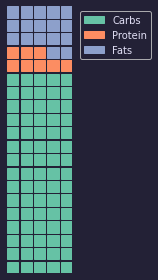

In [8]:
# useful libraries, including pyWaffle
import matplotlib.pyplot as plt
from pywaffle import Waffle

# create simple dummy data
data = {'Carbs': 75, 'Protein': 8, 'Fats': 17}

plt.style.use("rose-pine-moon.mplstyle")

# Basic waffle
plt.figure(
  FigureClass=Waffle,
  rows=20,
  columns=5,
  values=data,
  vertical=True,
  legend={'loc': 'upper left', 'bbox_to_anchor': (1.05, 1)},
)
plt.show()

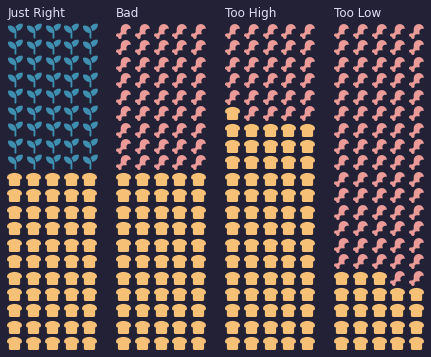

In [9]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # for the legend
from pywaffle import Waffle
import pandas as pd

plt.style.use("rose-pine-moon.mplstyle")

data = {
    'Just Right': [55, 45, 0],
    'Bad': [55, 0, 45],
    'Too High': [71, 0, 29],
    'Too Low': [23,0,77]
}

df = pd.DataFrame(data,
                  index=['Carbs', 'Veggies','Healthy Oil'])

number_of_bars = len(df.columns) # one bar per year
colors = ["#f6c177","#3e8fb0", "#ea9a97"]

# Init the whole figure and axes
fig, axs = plt.subplots(nrows=1,
                        ncols=number_of_bars,
                        figsize=(8,6),)

# Iterate over each bar and create it
for i,ax in enumerate(axs):
    
    col_name = df.columns[i]
    values = df[col_name]/1000 # values from the i-th column
    
    Waffle.make_waffle(
        ax=ax,  # pass axis to make_waffle 
        rows=20,
        columns=5,
        values=values,
        title={"label": col_name, "loc": "left"},
        colors=colors,
        vertical=True,
        icons=['bread-slice', 'seedling','drumstick-bite'],
        font_size=15, # size of each point
        icon_legend=True,
        legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    )
    
# Add a title
# fig.suptitle('Vehicle Production by Year and Vehicle Type',
#              fontsize=14, fontweight='bo ld')


# Add a legend
legend_labels = df.index
legend_elements = [mpatches.Patch(color=colors[i],
                                  label=legend_labels[i]) for i in range(len(colors))]
# fig.legend(
#     handles=legend_elements,
#            loc="upper left",
#         #    title="Vehicle Types",
#            bbox_to_anchor=(0, 0),
#            framealpha=0,
#            fontsize=12,
#            ncol=3
#            )

plt.subplots_adjust(right=0.85)

ax.minorticks_off()

ax.set_xticklabels([])
ax.set_yticklabels([])

# ax.set_axis_off()
ax.grid(True)  

ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
plt.show()

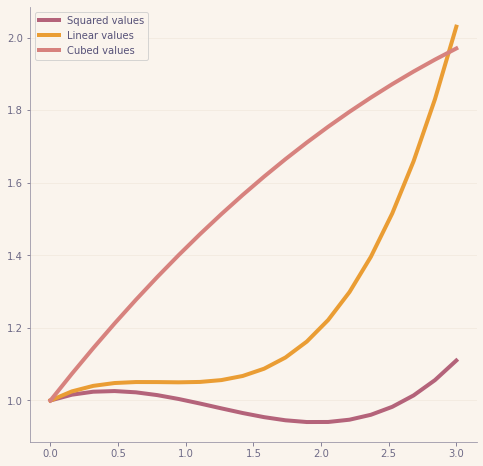

In [11]:
# Custom legend for right plot

plt.style.use("rose-pine-dawn.mplstyle")


# Sample data
x = np.array([0, 1, 2, 3])
y1 = np.array([1, 1.00, 0.94, 1.11])
y2 = np.array([1, 1.05, 1.2, 2.03])
y3 = np.array([1, 1.42, 1.74, 1.97])
colors = ["#1B9E77", "#D95F02", "#7570B3"]


X_Y_Spline1 = make_interp_spline(x, y1)
X_Y_Spline2 = make_interp_spline(x, y2)
X_Y_Spline3 = make_interp_spline(x, y3)

 
# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(x.min(), x.max(), 20)

Y_1 = X_Y_Spline1(X_)
Y_2 = X_Y_Spline2(X_)
Y_3 = X_Y_Spline3(X_)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Plot
ax.plot(X_, Y_1, label='Squared values',  linewidth=4)
ax.plot(X_, Y_2, label='Linear values',  linewidth=4)
ax.plot(X_, Y_3, label='Cubed values', linewidth=4)
ax.legend()

# ax.fill_between(X_, Y_1, Y_2)

ax.spines[["top", "right"]].set_visible(False)


# Custom legend
# ax_text(x=1, y=1, ax=ax, s="Bitcoin", fontsize=12, fontweight="bold", va="top", ha="left", rotation=65)
# ax_text(x=1, y=1, ax=ax, s="Ethereum", fontsize=12, fontweight="bold", va="top", ha="left",  rotation=3)
# ax_text(x=1, y=1, ax=ax, s="S&P 500", fontsize=12, fontweight="bold", va="top", ha="left",  rotation=18)

# Show the plot
plt.show()

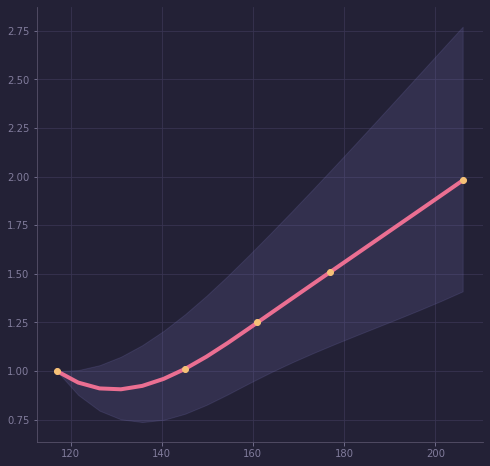

In [ ]:
# Custom legend for right plot



# Sample data
x = np.array([ 117,
 145,
 161,
 177,
 206])

y1 = np.array([1, 1.29, 1.64, 2.03, 2.77])
y2 = np.array([1, 0.78, 0.96, 1.13, 1.41])
y3 = np.array([1, 1.01, 1.25, 1.51, 1.98])
colors = ["#1B9E77", "#D95F02", "#7570B3"]

plt.style.use("rose-pine-moon.mplstyle")

X_Y_Spline1 = make_interp_spline(x, y1)
X_Y_Spline2 = make_interp_spline(x, y2)
X_Y_Spline3 = make_interp_spline(x, y3)

 
# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(x.min(), x.max(), 20)

Y_1 = X_Y_Spline1(X_)
Y_2 = X_Y_Spline2(X_)
Y_3 = X_Y_Spline3(X_)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Plot
# ax.plot(X_, Y_1, label='Squared values',  linewidth=4)
# ax.plot(X_, Y_2, label='Linear values',  linewidth=4)

ax.fill_between(X_, Y_1, Y_2, alpha=0.2, color="#7570B3")

ax.plot(X_, Y_3, label='Cubed values', linewidth=4)
ax.plot(x,y3, linewidth=0, marker="o")
# ax.legend()

# ax.fill_between(X_, Y_1, Y_2)

ax.spines[["top", "right"]].set_visible(False)


# Custom legend
# ax_text(x=1, y=1, ax=ax, s="Bitcoin", fontsize=12, fontweight="bold", va="top", ha="left", rotation=65)
# ax_text(x=1, y=1, ax=ax, s="Ethereum", fontsize=12, fontweight="bold", va="top", ha="left",  rotation=3)
# ax_text(x=1, y=1, ax=ax, s="S&P 500", fontsize=12, fontweight="bold", va="top", ha="left",  rotation=18)

# ax.set_title("Coronary Heart Disease Risk in Women by Protein Consumed")
# ax.minorticks_off()

# ax.set_xticklabels([])
# ax.set_yticklabels([])

# ax.set_axis_off()
ax.grid(True)  
# Show the plot
plt.show()

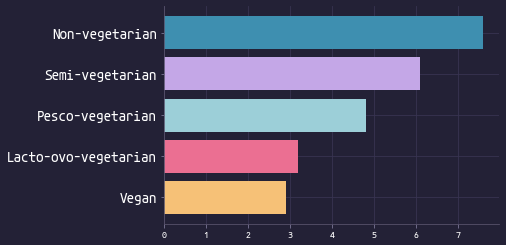

In [4]:
# libraries
# create dataset
plt.style.use("rose-pine-dawn.mplstyle")


height = [2.9, 4.8, 3.2, 6.1, 7.6]
bars = ('Vegan', 'Pesco-vegetarian', 'Lacto-ovo-vegetarian', 'Semi-vegetarian', 'Non-vegetarian')

df = pd.DataFrame({
    'Group': bars,
    'Value': height
})

plt.style.use("rose-pine-moon.mplstyle")

color = ['#f6c177', '#eb6f92', '#9ccfd8', '#c4a7e7', '#3e8fb0']

# Initialize a Figure and an Axes
fig, ax = plt.subplots()

df = df.sort_values(by=['Value'])

# Create horizontal bars
ax.barh(y=df.Group, width=df.Value, color=color)

# ax.minorticks_off()

# ax.set_xticklabels([])
# ax.set_yticklabels([])

from matplotlib import rcParams

rcParams['font.family'] = ['Agave']

plt.yticks(fontsize = 15, fontfamily="Agave", color="white") 
plt.xticks(color="white")

ax.grid(True) 
# Show the plot
plt.show()

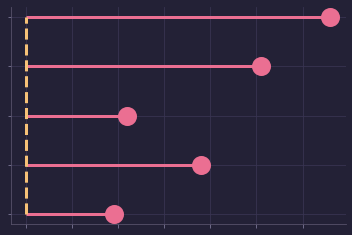

In [8]:
# libraries
# create dataset
height = [2.9, 4.8, 3.2, 6.1, 7.6]
bars = ('Vegan', 'Pesco-vegetarian', 'Lacto-ovo-vegetarian', 'Semi-vegetarian', 'Non-vegetarian')

df = pd.DataFrame({
    'Group': bars,
    'Value': height
})

plt.style.use("rose-pine-moon.mplstyle")

color = ['#f6c177', '#eb6f92', '#9ccfd8', '#c4a7e7', '#3e8fb0']

fig, ax = plt.subplots()

# plt.stem(x, y, markerfmt = 'o', linefmt='-', basefmt = '-', orientation="horizontal", bottom=1)

(markers, stemlines, baseline) = plt.stem(bars, height, markerfmt = 'o', linefmt='-', basefmt = '--', orientation="horizontal", bottom=1)
plt.setp(markers, marker='o', markersize=15, markeredgewidth=4)
plt.setp(stemlines, linestyle="-", linewidth=3)
plt.setp(baseline, linestyle="--", linewidth=3)

# plt.show()

# ax.set_title("Coronary Heart Disease Risk in Women by Protein Consumed")
ax.minorticks_off()

ax.set_xticklabels([])
ax.set_yticklabels([])

# ax.set_axis_off()
ax.grid(True)  

# ax.spines["top"].set_visible(False)
# ax.spines["bottom"].set_visible(False)
# ax.spines["right"].set_visible(False)
# ax.spines["left"].set_visible(False)
# ax.set_xticks([0.6,0.8,1.0,1.2,1.4])
# ax.set_xticklabels(x)
plt.show()

In [3]:
# Custom legend for right plot
# Sample data
x = np.array([ 17.62,
 19.27,
 20.44,
 23.39,])

y1 = np.array([1, 0.44, 0.45, 0.26])
y2 = np.array([1, 0.95, 1.00, 0.88])
y3 = np.array([1, 0.65, 0.71, 0.48])
colors = ["#1B9E77", "#D95F02", "#7570B3"]

plt.style.use("rose-pine-dawn.mplstyle")

X_Y_Spline1 = make_interp_spline(x, y1)
X_Y_Spline2 = make_interp_spline(x, y2)
X_Y_Spline3 = make_interp_spline(x, y3)

 
# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(x.min(), x.max(), 20)

Y_1 = X_Y_Spline1(X_)
Y_2 = X_Y_Spline2(X_)
Y_3 = X_Y_Spline3(X_)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Plot
# ax.plot(X_, Y_1, label='Squared values',  linewidth=4)
# ax.plot(X_, Y_2, label='Linear values',  linewidth=4)

ax.fill_between(X_, Y_1, Y_2, alpha=0.2, color="#7570B3")

ax.plot(X_, Y_3, label='Cubed values', linewidth=4)
ax.plot(x,y3, linewidth=0, marker="o")
# ax.legend()

# ax.fill_between(X_, Y_1, Y_2)

ax.spines[["top", "right"]].set_visible(False)


# Custom legend
# ax_text(x=1, y=1, ax=ax, s="Bitcoin", fontsize=12, fontweight="bold", va="top", ha="left", rotation=65)
# ax_text(x=1, y=1, ax=ax, s="Ethereum", fontsize=12, fontweight="bold", va="top", ha="left",  rotation=3)
# ax_text(x=1, y=1, ax=ax, s="S&P 500", fontsize=12, fontweight="bold", va="top", ha="left",  rotation=18)

# ax.set_title("Coronary Heart Disease Risk in Women by Protein Consumed")
# ax.minorticks_off()

# ax.set_xticklabels([])
# ax.set_yticklabels([])

# ax.set_axis_off()
ax.grid(True)  
# Show the plot
plt.show()

NameError: name 'np' is not defined

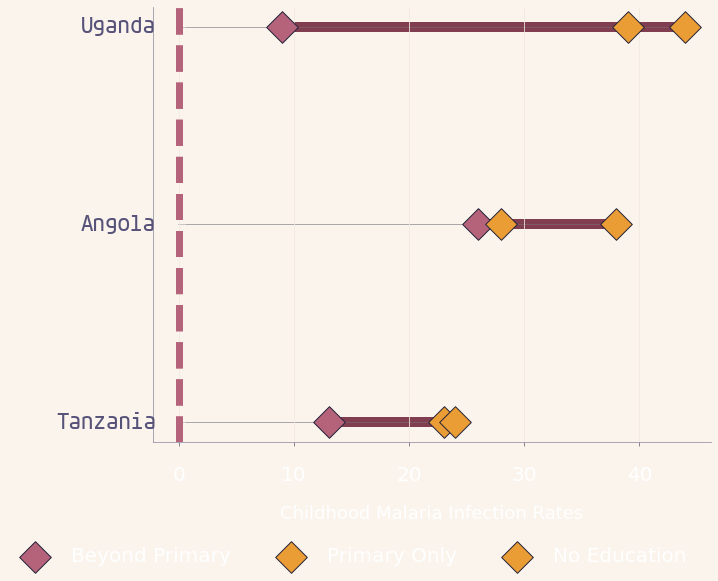

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("rose-pine-dawn.mplstyle")

# use textwrap from python standard lib to help manage how the description 
# text shows up 
import textwrap

# load best results
df = pd.read_csv('lolipop/forest/malaria.csv')
df.head()

# sort the dataframe
df = df.sort_values(by='auc_avg', ascending=True).reset_index(drop=True)
df.head()

# plt.style.use("seaborn-whitegrid")  # set style because it looks nice
fig, ax = plt.subplots(1, 1, figsize=(10, 8),)

# color palette to choose from
darkblue = "#EA9A97"
middle = "#286983"
redish = "#814F09"

DOT_SIZE = 500

# create the various dots
# avg dot

# min dot
ax.scatter(
    x=df["auc_min"],
    y=df["clf_name"],
    s=DOT_SIZE,
    alpha=1,
    # color=darkblue,
    marker="D",
    label="Beyond Primary",
    edgecolors="#26233A",
)
ax.scatter(
    x=df["auc_avg"],
    y=df["clf_name"],
    s=DOT_SIZE,
    alpha=1,
    label="Primary Only",
    marker="D",
    # color=middle,
    edgecolors="#26233A",
)



# max dot
ax.scatter(
    x=df["auc_max"],
    y=df["clf_name"],
    s=DOT_SIZE,
    alpha=1,
    label="No Education ",
    marker="D",
    color="#ea9d34",
    edgecolors="#26233A",
)

# create the horizontal line
# between min and max vals
ax.hlines(
    y=df["clf_name"],
    xmin=df["auc_max"],
    xmax=df["auc_min"],
    # # color="grey",
    alpha=1,
    lw=10, # line-width
    zorder=0, # make sure line at back
    color="#803E50",
    # edgecolors="#232136"
)

x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()

# dictionary used to map the column labels from df to a readable name
label_dict = {
    "Angola": "Angola",
    "Tanzania": "Tanzania",
    "Uganda": "Uganda"
}

# iterate through each result and apply the text
# df should already be sorted
for i in range(0, df.shape[0]):

    # add thin leading lines towards classifier names
    # to the right of max dot
    ax.plot(
        [df["auc_max"][i] + 0.02, 0.6],
        [i, i],
        linewidth=1,
        color="grey",
        alpha=0.4,
        zorder=0,
    )
    
    # to the left of min dot
    ax.plot(
        [-0.05, df["auc_min"][i] - 0.02],
        [i, i],
        linewidth=1,
        color="grey",
        alpha=0.4,
        zorder=0,
    )

    ax.axvline(0,0,1.0,linestyle="--",linewidth="7")

    # add classifier name text
    clf_name = label_dict[df["clf_name"][i]]
    ax.text(
        x=-2,
        y=i,
        s=clf_name,
        horizontalalignment="right",
        verticalalignment="center",
        size="25",
        fontfamily="Agave",
        # color="dimgrey",
        weight="normal",
    )


# remove the y ticks
ax.set_yticks([])

# create legend
ax.legend(
    frameon=False,
    bbox_to_anchor=(1, -0.2),
    ncol=3,
    fontsize="20",
    labelcolor="white"
)

ax.set_xlabel(
    "Childhood Malaria Infection Rates",
    fontsize="18",
    labelpad=20,
    color="white"
)


# drop the gridlines (inherited from 'seaborn-whitegrid' style)
# and drop all the spines
ax.grid(True)  
# ax.spines["top"].set_visible(False)
# ax.spines["bottom"].set_visible(False)
# ax.spines["right"].set_visible(False)
# ax.spines["left"].set_visible(False)

# custom set the xticks since this looks better
# ax.set_xticks([0.0, 0.2, 0.4, 0.6])

# set properties of xtick labels
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.tick_params.html#matplotlib.axes.Axes.tick_params
ax.tick_params(axis="x", pad=20, labelsize="20", labelcolor="white")



# plt.savefig('best_results.svg',dpi=150, bbox_inches = "tight")
plt.show()


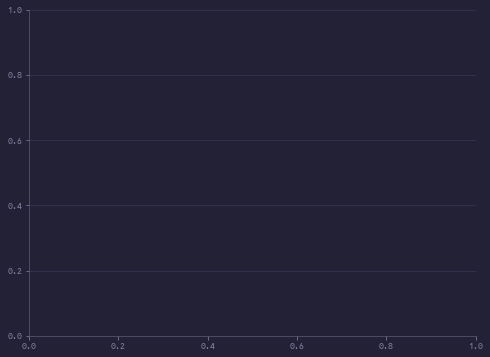

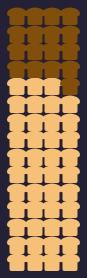

In [11]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # for the legend
from pywaffle import Waffle
import pandas as pd

plt.style.use("rose-pine-moon.mplstyle")

data = {
    'mod': [71, 29],
}

df = pd.DataFrame(data,
                  index=['Carbs', 'Veggies'])

number_of_bars = len(df.columns) # one bar per year
colors = ["#f6c177","#814F09"]

# Init the whole figure and axes
fig, axs = plt.subplots(nrows=1,
                        ncols=number_of_bars,
                        figsize=(8,6),)

# Iterate over each bar and create it
# for i,ax in enumerate(axs):
    
plt.figure(
  FigureClass=Waffle,
  rows=15,
  columns=4,
  values=df['mod'],
  vertical=True,
  colors=colors,
  font_size=20,
  legend={'loc': 'upper left', 'bbox_to_anchor': (1.05, 1)},
          icons=['bread-slice', 'bread-slice'],
)
    
# Add a title
# fig.suptitle('Vehicle Production by Year and Vehicle Type',
#              fontsize=14, fontweight='bo ld')


# Add a legend
legend_labels = df.index
legend_elements = [mpatches.Patch(color=colors[i],
                                  label=legend_labels[i]) for i in range(len(colors))]
# fig.legend(
#     handles=legend_elements,
#            loc="upper left",
#         #    title="Vehicle Types",
#            bbox_to_anchor=(0, 0),
#            framealpha=0,
#            fontsize=12,
#            ncol=3
#            )

plt.subplots_adjust(right=0.85)

ax.minorticks_off()

ax.set_xticklabels([])
ax.set_yticklabels([])

# ax.set_axis_off()
ax.grid(True)  

ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
plt.show()

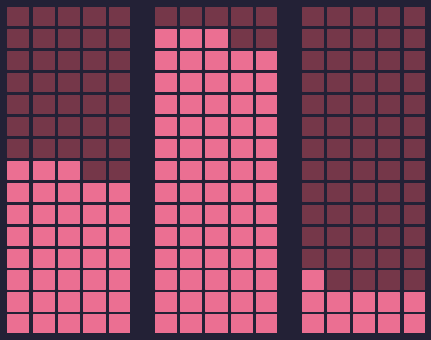

In [12]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # for the legend
from pywaffle import Waffle
import pandas as pd

plt.style.use("rose-pine-moon.mplstyle")

data = {
    # 'Just Right': [55, 45, 0],
    'Moderate': [50, 50],
    'Too High': [82, 8],
    'Too Low': [15,85],
}

df = pd.DataFrame(data,
                  index=['Carbs', 'Other Foods'])

number_of_bars = len(df.columns) # one bar per year
colors = ["#eb6f92","#753749"]

# Init the whole figure and axes
fig, axs = plt.subplots(nrows=1,
                        ncols=number_of_bars,
                        figsize=(8,6),)

# Iterate over each bar and create it
for i,ax in enumerate(axs):
    
    col_name = df.columns[i]
    values = df[col_name]/1000 # values from the i-th column
    
    Waffle.make_waffle(
        ax=ax,  # pass axis to make_waffle 
        rows=15,
        columns=5,
        values=values,
        # title={"label": col_name, "loc": "left"},
        colors=colors,
        vertical=True,
        # icons=["square","square"],
        font_size=20, # size of each point
        icon_legend=True,
        block_aspect_ratio=1.618,
        # interval_ratio_x=1,
        # interval_ratio_y=0.5,
        # legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    )
    
# Add a title
# fig.suptitle('Vehicle Production by Year and Vehicle Type',
#              fontsize=14, fontweight='bo ld')


# Add a legend
legend_labels = df.index
legend_elements = [mpatches.Patch(color=colors[i],
                                  label=legend_labels[i]) for i in range(len(colors))]
# fig.legend(
#     handles=legend_elements,
#            loc="upper left",
#         #    title="Vehicle Types",
#            bbox_to_anchor=(0, 0),
#            framealpha=0,
#            fontsize=12,
#            ncol=3
#            )

plt.subplots_adjust(right=0.85)

ax.minorticks_off()

ax.set_xticklabels([])
ax.set_yticklabels([])

# ax.set_axis_off()
ax.grid(True)  

ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
plt.show()

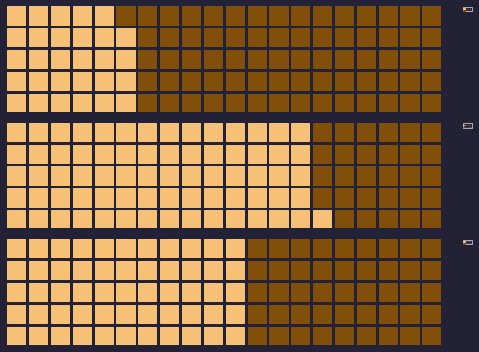

In [13]:
from matplotlib import rcParams

rcParams['font.family'] = ['Agave']

data = {'labels': ['carbs', 'nocarbs'],
        'Factory A': [55, 45],
        'Factory B': [71,29],
        'Factory C': [29,71],
       }
df = pd.DataFrame(data).set_index('labels')

plot1 = {'values': [value for value in data['Factory A']],  # Convert actual number to a reasonable block number
         'labels': [f"{index} ({value})" for index, value in zip(df['Factory A'],df.index)],
         'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 0},
        #  'title': {'label': 'Vehicle Production of Factory A', 'loc': 'left', 'fontsize': 12, 'fontfamily':"Agave"},
         'colors': ["#f6c177","#814F09"]
        }

plot2 = {'values': [value for value in data['Factory B']],
         'labels': [f"{index} ({value})" for index, value in zip(df['Factory B'],df.index)],
         'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 0},
        #  'title': {'label': 'Vehicle Production of Factory B', 'loc': 'left', 'fontsize': 12},
         'colors': ["#f6c177","#814F09"]
        }

plot3 = {'values': [value for value in data['Factory C']],
         'labels': [f"{index} ({value})" for index, value in zip(df['Factory C'],df.index)],
         'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 0},
        #  'title': {'label': 'Vehicle Production of Factory C', 'loc': 'left', 'fontsize': 12},
         'colors': ["#f6c177","#814F09"]
        }

        

fig = plt.figure(
    FigureClass=Waffle,
    plots={
        311: plot3,
        312: plot2,
        313: plot1,
    },
    rows=5,  # Outside parameter applied to all subplots, same as below
    # cmap_name="Accent",  # Change color with cmap
    # rounding_rule='ceil',  # Change rounding rule, so value less than 1000 will still have at least 1 block
    figsize=(7,5)
)


plt.show()

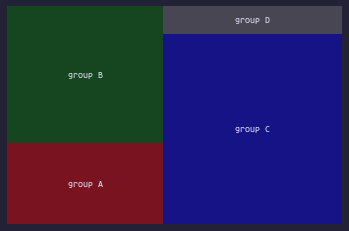

In [14]:
#libraries
import matplotlib.pyplot as plt
import squarify # pip install squarify (algorithm for treemap)
 
# Change color
squarify.plot(sizes=[13,22,35,5], label=["group A", "group B", "group C", "group D"], color=["red","green","blue", "grey"], alpha=.4 )
plt.axis('off')
plt.show()

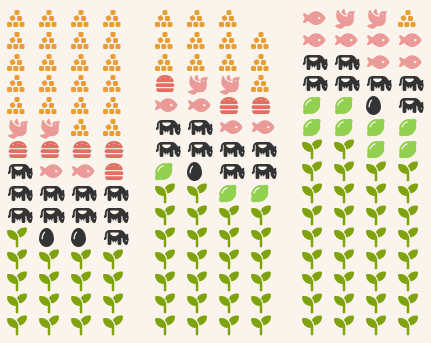

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # for the legend
from pywaffle import Waffle
import pandas as pd

plt.style.use("rose-pine-dawn.mplstyle")

data = {
    # 'Just Right': [55, 45, 0],
    'Western Diet': [50, 250,200,0,0,50,300,50,100,50,75,500,25,150],
    'Middle Point': [137.5, 325,300,12.5,100,37.5,250,125,50,25,62.5,250,25,100],
    'Optimal Diet': [225,400,400,25,200,25,200,200,0,0,50,0,25,50],
}

df = pd.DataFrame(data,
                  index=[
                        'Whole Grains',
                        'Vegetables',
                        'Fruits',
                        'Nuts',
                        'Legumes',
                        'Eggs',
                        'Milk/ dairy',
                        'Fish',
                        'Red Meat',
                        'Processed Meat',
                        'White Meat',
                        'Sugar Beverages',
                        'Added Plant Oils',
                        'Refined Grains',
                        ])

# icons = [
#         'wheat-awn',
#         'seedling',
#         'apple-whole',
#         'lemon',
#         'stroopwafel',

#         'cheese',
#         'egg',

#         'fish',
#         'bone',
#         'burger',
#         'drumstick-bite',

#         'bottle-droplet',
#         'droplet',
#         'cubes-stacked'
# ]

icons = [
        'seedling',
        'seedling',
        'seedling',
        'lemon',
        'lemon',

        'egg',
        'cow',

        'fish',
        'burger',
        'burger',
        'dove',

        'cubes-stacked',
        'cubes-stacked',
        'cubes-stacked'
]

number_of_bars = 3 # one bar per year
colors = [
        '#7EA30D',
        '#7EA30D',
        '#7EA30D',
        '#92D050',
        '#92D050',

        '#333333',
        '#333333',

        '#ea9a97',
        '#E26F62',
        '#E26F62',
        '#ea9a97',

        '#ea9d34',
        '#ea9d34',
        '#ea9d34'
        ]
# Init the whole figure and axes
fig, axs = plt.subplots(nrows=1,
                        ncols=number_of_bars,
                        figsize=(8,6),)

# Iterate over each bar and create it
for i,ax in enumerate(axs):
    
    col_name = df.columns[i]
    values = df[col_name]/10 # values from the i-th column
    
    Waffle.make_waffle(
        ax=ax,  # pass axis to make_waffle 
        rows=15,
        columns=4,
        values=values,
        # title={'family':'Agave','size':17,"label": col_name, "loc": "center"},
        colors=colors,
        vertical=True,
        icons=icons,
        font_size=20, # size of each point
        icon_legend=True,
        block_aspect_ratio=1.618,
        # interval_ratio_x=1,
        # interval_ratio_y=0.5,
        legend={'font_size':35,'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    )
    
# Add a title
# fig.suptitle('Vehicle Production by Year and Vehicle Type',
#              fontsize=14, fontweight='bo ld')


# Add a legend
legend_labels = df.index
legend_elements = [mpatches.Patch(color=colors[i],
                                  label=legend_labels[i]) for i in range(len(colors))]
# fig.legend(
#     handles=legend_elements,
#            loc="upper left",
#         #    title="Vehicle Types",
#            bbox_to_anchor=(0, 0),
#            framealpha=0,
#            fontsize=12,
#            ncol=3
#            )

plt.subplots_adjust(right=0.85)

ax.minorticks_off()

ax.set_xticklabels([])
ax.set_yticklabels([])

# ax.set_axis_off()
ax.grid(True)  

ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # for the legend
from pywaffle import Waffle
import pandas as pd

plt.style.use("rose-pine-moon.mplstyle")

data = {
    # 'Just Right': [55, 45, 0],
    'TW': [63,25,12],
    # 'Feasibility': [137.5, 325,300,12.5,100,125,37.5,250,100,50,25,62.5,250,25],
    # 'Optimal': [225,400,400,25,200,200,25,200,50,0,0,50,0,25],
}

df = pd.DataFrame(data,
                  index=[
                        'Processed Foods',
                        'Animal Products',
                        'Vegetables'
                        ])

number_of_bars = len(df.columns) # one bar per year
colors = [
        '#ea9d34',
        '#E26F62',
        '#7EA30D'
        ]
icons = [
        'candy-cane',
        'burger',
        'seedling'
]

# Init the whole figure and axes
fig, axs = plt.subplots(nrows=1,
                        ncols=number_of_bars,
                        figsize=(8,6),)

# Iterate over each bar and create it
# for i,ax in enumerate(axs):
    
plt.figure(
  FigureClass=Waffle,
  rows=15,
  columns=10,
  values=df['TW'],
  vertical=True,
  colors=colors,
  font_size=15,
  legend={'loc': 'upper left', 'bbox_to_anchor': (1.05, 1)},
          icons=icons,
)
    
# Add a title
# fig.suptitle('Vehicle Production by Year and Vehicle Type',
#              fontsize=14, fontweight='bo ld')


# Add a legend
legend_labels = df.index
legend_elements = [mpatches.Patch(color=colors[i],
                                  label=legend_labels[i]) for i in range(len(colors))]
fig.legend(
    handles=legend_elements,
           loc="upper left",
        #    title="Vehicle Types",
           bbox_to_anchor=(0, 0),
           framealpha=0,
           fontsize=12,
           ncol=3
           )

plt.subplots_adjust(right=0.85)

ax.minorticks_off()

ax.set_xticklabels([])
ax.set_yticklabels([])

# ax.set_axis_off()
ax.grid(True)  

ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
plt.show()

NameError: name 'ax' is not defined

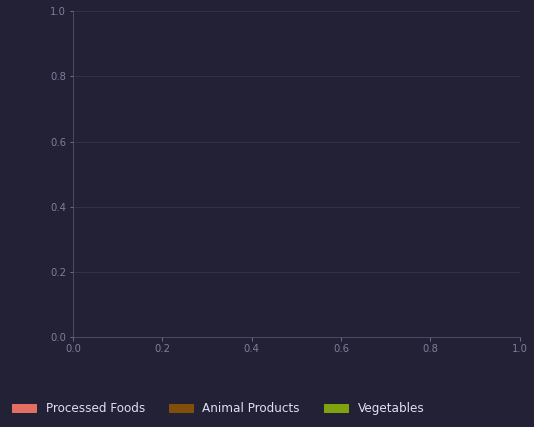

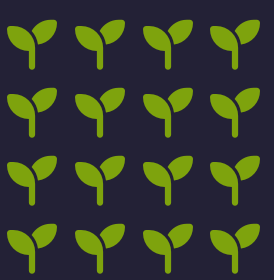

In [17]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # for the legend
from pywaffle import Waffle
import pandas as pd

plt.style.use("rose-pine-moon.mplstyle")

data = {
    # 'Just Right': [55, 45, 0],
    'TW': [0,0,50],
    # 'Feasibility': [137.5, 325,300,12.5,100,125,37.5,250,100,50,25,62.5,250,25],
    # 'Optimal': [225,400,400,25,200,200,25,200,50,0,0,50,0,25],
}

df = pd.DataFrame(data,
                  index=[
                        'Processed Foods',
                        'Animal Products',
                        'Vegetables'
                        ])

number_of_bars = len(df.columns) # one bar per year
colors = [
        # '#ea9d34',
        '#E26F62',
        # '#7EA30D',
        # '#32728D',
        '#814F09',
        '#7EA30D'
        ]
icons = [
        'seedling',
        'seedling',
        'seedling'
]

# Init the whole figure and axes
fig, axs = plt.subplots(nrows=1,
                        ncols=number_of_bars,
                        figsize=(8,6),)

# Iterate over each bar and create it
# for i,ax in enumerate(axs):
    
plt.figure(
  FigureClass=Waffle,
  rows=4,
  columns=4,
  values=df['TW'],
  vertical=True,
  colors=colors,
  font_size=50,
  legend={'loc': 'upper left', 'bbox_to_anchor': (1.05, 1)},
          icons=icons,
)
    
# Add a title
# fig.suptitle('Vehicle Production by Year and Vehicle Type',
#              fontsize=14, fontweight='bo ld')


# Add a legend
legend_labels = df.index
legend_elements = [mpatches.Patch(color=colors[i],
                                  label=legend_labels[i]) for i in range(len(colors))]
fig.legend(
    handles=legend_elements,
           loc="upper left",
        #    title="Vehicle Types",
           bbox_to_anchor=(0, 0),
           framealpha=0,
           fontsize=12,
           ncol=3
           )

plt.subplots_adjust(right=0.85)

ax.minorticks_off()

ax.set_xticklabels([])
ax.set_yticklabels([])

# ax.set_axis_off()
ax.grid(True)  

ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
plt.show()